In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set params for use across all graphs
# If there are problems generating LATEX in graphs, comment out the top two params below
graph_params = {
    'text.latex.preamble': '\\usepackage{gensymb}',
    'text.usetex': True,
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'font.family': 'serif',
    'figure.figsize': [5.5, 9],
    'font.size': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    "figure.facecolor": 'white',
}
plt.rcParams.update(graph_params)

In [3]:
# Parameters for linear model
params_lin = {
    'r'       : 0.25,   # damping of upper ocean heat content
    'alpha'   : 0.125,  # relates enhanced easterly wind stress to the recharge of ocean heat content
    'gamma'   : 0.75,   # specifies feedback of the thermocline gradient on SST gradient
    'c'       : 1.,     # damping rate of SST anomalies
    'b0'      : 2.5,    # max coupling param
    'e_n'     : 0.,     # non-linearity of ROM
    'xi_1'    : 0.,     # random wind stress forcing
    'xi_2'    : 0.,     # random heating
    'mu'      : 2/3,    # critical relative coupling param
    'mu_0'    : 0.75,   # modifier for mu for self-excitation
    'mu_ann'  : 0.2,    # annual variation for mu for self-excitiation
    'tau'     : 12,     # self-excitation timescale
    'f_ann'   : 0.02,   # annual wind fluctuation
    'f_ran'   : 0.2,    # random wind fluctuation
    'tau_corr': 1/30,   # correlation timescale = 1 day (assuming 30 days in 1 month)

    't_nd'    : 2.,     # non-dimensional time parameter = 2 months
    'hw_nd'   : 150.,   # non-dimensional thermocline depth anomaly = 150 meters
    'Te_nd'   : 7.5,    # non-dimensional temperature anomaly = 7.5 Kelvin
    'name'    : "params_lin_crit", # param name to use for outputs
}

# Parameters for linear model with subcritical value of mu
params_lin_subcrit = {
    'r'       : 0.25,   # damping of upper ocean heat content
    'alpha'   : 0.125,  # relates enhanced easterly wind stress to the recharge of ocean heat content
    'gamma'   : 0.75,   # specifies feedback of the thermocline gradient on SST gradient
    'c'       : 1.,     # damping rate of SST anomalies
    'b0'      : 2.5,    # max coupling param
    'e_n'     : 0.,    # non-linearity of ROM
    'xi_1'    : 0.,     # random wind stress forcing
    'xi_2'    : 0.,     # random heating
    'mu'      : 0.6,    # subcritical relative coupling param
    'mu_0'    : 0.75,   # modifier for mu for self-excitation
    'mu_ann'  : 0.2,    # annual variation for mu for self-excitiation
    'tau'     : 12,     # self-excitation timescale
    'f_ann'   : 0.02,   # annual wind fluctuation
    'f_ran'   : 0.2,    # random wind fluctuation
    'tau_corr': 1/30,   # correlation timescale = 1 day (assuming 30 days in 1 month)

    't_nd'    : 2.,     # non-dimensional time parameter = 2 months
    'hw_nd'   : 150.,   # non-dimensional thermocline depth anomaly = 150 meters
    'Te_nd'   : 7.5,    # non-dimensional temperature anomaly = 7.5 Kelvin
    'name'    : "params_lin_subcrit", # param name to use for outputs
}

# Parameters for linear model with supercritical value of mu
params_lin_supercrit = {
    'r'       : 0.25,   # damping of upper ocean heat content
    'alpha'   : 0.125,  # relates enhanced easterly wind stress to the recharge of ocean heat content
    'gamma'   : 0.75,   # specifies feedback of the thermocline gradient on SST gradient
    'c'       : 1.,     # damping rate of SST anomalies
    'b0'      : 2.5,    # max coupling param
    'e_n'     : 0.,    # non-linearity of ROM
    'xi_1'    : 0.,     # random wind stress forcing
    'xi_2'    : 0.,     # random heating
    'mu'      : 0.7,    # supercritical relative coupling param
    'mu_0'    : 0.75,   # modifier for mu for self-excitation
    'mu_ann'  : 0.2,    # annual variation for mu for self-excitiation
    'tau'     : 12,     # self-excitation timescale
    'f_ann'   : 0.02,   # annual wind fluctuation
    'f_ran'   : 0.2,    # random wind fluctuation
    'tau_corr': 1/30,   # correlation timescale = 1 day (assuming 30 days in 1 month)

    't_nd'    : 2.,     # non-dimensional time parameter = 2 months
    'hw_nd'   : 150.,   # non-dimensional thermocline depth anomaly = 150 meters
    'Te_nd'   : 7.5,    # non-dimensional temperature anomaly = 7.5 Kelvin
    'name'    : "params_lin_supercrit", # param name to use for outputs
}

# Parameters for nonlinear model
params_nonlin = {
    'r'       : 0.25,   # damping of upper ocean heat content
    'alpha'   : 0.125,  # relates enhanced easterly wind stress to the recharge of ocean heat content
    'gamma'   : 0.75,   # specifies feedback of the thermocline gradient on SST gradient
    'c'       : 1.,     # damping rate of SST anomalies
    'b0'      : 2.5,    # max coupling param
    'e_n'     : 0.1,    # non-linearity of ROM
    'xi_1'    : 0.,     # random wind stress forcing
    'xi_2'    : 0.,     # random heating
    'mu'      : 2/3,    # critical relative coupling param
    'mu_0'    : 0.75,   # modifier for mu for self-excitation
    'mu_ann'  : 0.2,    # annual variation for mu for self-excitiation
    'tau'     : 12,     # self-excitation timescale
    'f_ann'   : 0.02,   # annual wind fluctuation
    'f_ran'   : 0.2,    # random wind fluctuation
    'tau_corr': 1/30,   # correlation timescale = 1 day (assuming 30 days in 1 month)

    't_nd'    : 2.,     # non-dimensional time parameter = 2 months
    'hw_nd'   : 150.,   # non-dimensional thermocline depth anomaly = 150 meters
    'Te_nd'   : 7.5,    # non-dimensional temperature anomaly = 7.5 Kelvin
    'name'    : "params_nonlin_crit", # param name to use for outputs
}

# Parameters for nonlinear model with supercritical value of mu
params_nonlin_supercrit = {
    'r'       : 0.25,   # damping of upper ocean heat content
    'alpha'   : 0.125,  # relates enhanced easterly wind stress to the recharge of ocean heat content
    'gamma'   : 0.75,   # specifies feedback of the thermocline gradient on SST gradient
    'c'       : 1.,     # damping rate of SST anomalies
    'b0'      : 2.5,    # max coupling param
    'e_n'     : 0.1,    # non-linearity of ROM
    'xi_1'    : 0.,     # random wind stress forcing
    'xi_2'    : 0.,     # random heating
    'mu'      : 0.7,    # subcritical relative coupling param
    'mu_0'    : 0.75,   # modifier for mu for self-excitation
    'mu_ann'  : 0.2,    # annual variation for mu for self-excitiation
    'tau'     : 12,     # self-excitation timescale
    'f_ann'   : 0.02,   # annual wind fluctuation
    'f_ran'   : 0.2,    # random wind fluctuation
    'tau_corr': 1/30,   # correlation timescale = 1 day (assuming 30 days in 1 month)

    't_nd'    : 2.,     # non-dimensional time parameter = 2 months
    'hw_nd'   : 150.,   # non-dimensional thermocline depth anomaly = 150 meters
    'Te_nd'   : 7.5,    # non-dimensional temperature anomaly = 7.5 Kelvin
    'name'    : "params_nonlin_supercrit", # param name to use for outputs
}

# Parameters for nonlinear model with mu = 0.9
params_nonlin_supercrit_9 = {
    'r'       : 0.25,   # damping of upper ocean heat content
    'alpha'   : 0.125,  # relates enhanced easterly wind stress to the recharge of ocean heat content
    'gamma'   : 0.75,   # specifies feedback of the thermocline gradient on SST gradient
    'c'       : 1.,     # damping rate of SST anomalies
    'b0'      : 2.5,    # max coupling param
    'e_n'     : 0.1,    # non-linearity of ROM
    'xi_1'    : 0.,     # random wind stress forcing
    'xi_2'    : 0.,     # random heating
    'mu'      : 0.9,    # subcritical relative coupling param
    'mu_0'    : 0.75,   # modifier for mu for self-excitation
    'mu_ann'  : 0.2,    # annual variation for mu for self-excitiation
    'tau'     : 12,     # self-excitation timescale
    'f_ann'   : 0.02,   # annual wind fluctuation
    'f_ran'   : 0.2,    # random wind fluctuation
    'tau_corr': 1/30,   # correlation timescale = 1 day (assuming 30 days in 1 month)

    't_nd'    : 2.,     # non-dimensional time parameter = 2 months
    'hw_nd'   : 150.,   # non-dimensional thermocline depth anomaly = 150 meters
    'Te_nd'   : 7.5,    # non-dimensional temperature anomaly = 7.5 Kelvin
    'name'    : "params_nonlin_supercrit_9", # param name to use for outputs
}

In [4]:
def setup_arrays(nt, Te_init, hw_init):
    """
    Function which sets up arrays with nt elements and adds initial conditions
    which are passed as input
    Returns: Arrays for storing Te, hw and time
    """
    # Setup output arrays
    Te_array = np.ones(nt)
    hw_array = np.ones(nt)
    time_array = np.ones(nt)

    # Add ICs to arrays
    Te_array[0] = Te_init
    hw_array[0] = hw_init
    time_array[0] = 0.0

    return Te_array, hw_array, time_array

def Te_update(Temp, depth, derived_vals, params):
    """
    Function which iterates Te forward in time, based on the ROM model
    Args: current Te, current hw, derived values [b, R, xi],
    and model parameters as a dict
    Returns updated Te value 
    """
    b, R, xi = derived_vals
    gamma = params['gamma']
    e_n = params['e_n']
    xi_2 = params['xi_2']
    return R*Temp + gamma*depth - e_n*(depth + b*Temp)**3 + gamma*xi + xi_2

def hw_update(Temp, depth, derived_vals, params):
    """
    Function which iterates hw forward in time, based on the ROM model
    Args: current Te, current hw, derived values [b, R, xi],
    and model parameters as a dict
    Returns updated hw value 
    """
    b, R, xi = derived_vals
    r = params['r']
    alpha = params['alpha']
    return -r*depth - alpha*b*Temp - alpha*xi

def forward_euler(Te, hw, dt, derived_vals, params):
    """
    Function which iterates Te and hw forward in time using the forward Euler scheme
    aka Forward Time. 
    Args: current Te, current hw, timestep dt, derived values [b, R, xi],
    and model parameters as a dict
    """
    Te_new = Te + dt*(Te_update(Te, hw, derived_vals, params))
    hw_new = hw + dt*(hw_update(Te, hw, derived_vals, params))
    return Te_new, hw_new

def matsuno(Te, hw, dt, derived_vals, params):
    """
    Function which iterates Te and hw forward in time using the matsuno scheme
    aka predictor-corrector with beta = 1, alpha=0 
    Args: current Te, current hw, timestep dt, derived values [b, R, xi],
    and model parameters as a dict
    """
    Te_star = Te + dt*(Te_update(Te, hw, derived_vals, params))
    hw_star = hw + dt*(hw_update(Te, hw, derived_vals, params))

    Te_new = Te + dt*(Te_update(Te_star, hw_star, derived_vals, params))
    hw_new = hw + dt*(hw_update(Te_star, hw_star, derived_vals, params))

    return Te_new, hw_new

def heun(Te, hw, dt, derived_vals, params):
    """
    Function which iterates Te and hw forward in time using the heun scheme
    aka predictor-corrector with beta = 0.5, alpha=0.5
    Args: current Te, current hw, timestep dt, derived values [b, R, xi],
    and model parameters as a dict
    """
    Te_star = Te + dt*(Te_update(Te, hw, derived_vals, params))
    hw_star = hw + dt*(hw_update(Te, hw, derived_vals, params))

    Te_new = Te + 0.5*dt*(Te_update(Te_star, hw_star, derived_vals, params))
    hw_new = hw + 0.5*dt*(hw_update(Te_star, hw_star, derived_vals, params))

    Te_new += 0.5*dt*(Te_update(Te, hw, derived_vals, params))
    hw_new += 0.5*dt*(hw_update(Te, hw, derived_vals, params))

    return Te_new, hw_new

def runge_kutta(Te, hw, dt, derived_vals, params):
    """
    Function which iterates Te and hw forward in time using the runge-kutta scheme
    which is fourth order accurate.
    Args: current Te, current hw, timestep dt, derived values [b, R, xi],
    and model parameters as a dict
    """
    k1_Te = Te_update(Te, hw, derived_vals, params)
    k1_hw = hw_update(Te, hw, derived_vals, params)

    k2_Te = Te_update(Te + 0.5*k1_Te*dt, hw + 0.5*k1_hw*dt, derived_vals, params)
    k2_hw = hw_update(Te + 0.5*k1_Te*dt, hw + 0.5*k1_hw*dt, derived_vals, params)

    k3_Te = Te_update(Te + 0.5*k2_Te*dt, hw + 0.5*k2_hw*dt, derived_vals, params)
    k3_hw = hw_update(Te + 0.5*k2_Te*dt, hw + 0.5*k2_hw*dt, derived_vals, params)

    k4_Te = Te_update(Te + k3_Te*dt, hw + k3_hw*dt, derived_vals, params)
    k4_hw = hw_update(Te + k3_Te*dt, hw + k3_hw*dt, derived_vals, params)

    Te_new = Te + dt*(k1_Te + 2*k2_Te + 2*k3_Te + k4_Te)/6
    hw_new = hw + dt*(k1_hw + 2*k2_hw + 2*k3_hw + k4_hw)/6

    return Te_new, hw_new

def run_model(dt, nt, inits, params, flags, scheme=runge_kutta, show_plot=True):
    """
    Function for running the model
    Args:
        dt:
            Timestep to use for the model
        nt:
            Number of timesteps to run the model for
        inits:
            [Te_init, hw_init]
            Array of unperturbed initial confitions
        params:
            Dict of model params to use when running model
        flags:
            [av_flag, wf_ann_flag, wf_ran_flag]
            Flags to enable annual variation, annual wind forcing, and random wind forcing
        scheme:
            Scheme used to iterate the model
            Choose from: forward_euler, matsuno, heun, runge_kutta
            Defaults to runge_kutta
        show_plot:
            Flag for plotting results. Defaults to True
    Returns:
        [Te_array, hw_array, time_array]:
            Output values for Te, hw and the time
    """
    # Unpack arguments
    Te_init, hw_init = inits
    # av_flag, wf_flag = flags
    av_flag, wf_ann_flag, wf_ran_flag = flags

    # Setup and iterate arrays
    Te_array, hw_array, time_array = setup_arrays(nt, Te_init, hw_init)

    # self-excitation parameters
    mu_0   = params['mu_0']
    mu_ann = params['mu_ann']
    tau    = params['tau']/params['t_nd']   # non-dimensionalise

    # wind forcing parameters
    f_ann = params['f_ann']
    f_ran = params['f_ran']
    tau_corr = params['tau_corr']/params['t_nd']

    # nondimensionalise dt
    dt /= params['t_nd']

    # store iterated values
    Te_new = 0.0
    hw_new = 0.0

    # non-dimensionalise the arrays
    Te_array[0] /= params['Te_nd']
    hw_array[0] /= params['hw_nd']

    # set current values hw and Te
    Te = Te_array[0]
    hw = hw_array[0]

    for t in range(1, nt):
        phase = 2*np.pi*dt*t/tau

        # annual variation enabled from flag
        if av_flag:
            cos_arg = phase - 5*np.pi/6 
            mu = mu_0*(1 + mu_ann*np.cos(cos_arg))
        else:
            mu = params['mu']

        # wind forcing enabled from flag
        if wf_ann_flag and wf_ran_flag:
            W   = np.random.uniform(-1.0, 1.0)
            xi  = f_ann*np.cos(phase) 
            xi += f_ran*W*tau_corr/dt
        elif wf_ann_flag:
            xi = f_ann*np.cos(phase)
        elif wf_ran_flag:
            W  = np.random.uniform(-1.0, 1.0)
            xi = f_ran*W*tau_corr/dt
        else:
            xi = params['xi_1']

        b = params['b0']*mu   # measure of thermocline slope,
        R = params['gamma']*b - params['c']  # describes positive Bjerkness feedback
        derived_vals = [b, R, xi]

        # Iterate forward in time using the specified scheme
        Te_new, hw_new = scheme(Te, hw, dt, derived_vals, params)

        # copy values to array 
        Te_array[t] = Te_new
        hw_array[t] = hw_new
        time_array[t] = t*dt

        # copy new values to old param
        Te = Te_new
        hw = hw_new

    # re-dimensionalise the arrays
    Te_array *= params['Te_nd']
    hw_array *= params['hw_nd']
    time_array *= params['t_nd']

    # Plot results if flagged in input arg
    if show_plot:
        # Setup graph environment and plot results
        fig, ax = plt.subplots(2)
        ax_1_rhs = ax[1].twinx()
        ax[0].plot(Te_array, hw_array)
        ax[0].set_xlabel("$T_e$ (K)")
        ax[0].set_ylabel("$h_w$ (m)")
        ax[0].legend(
            title=f"{scheme.__name__} \n annual var: {av_flag} \n wind force: [{wf_ann_flag}, {wf_ran_flag}]", 
            loc='lower left',
            borderpad = 0.3,
        )
        ax[1].plot(time_array, Te_array, label='$T_e$')
        ax_1_rhs.plot(time_array, hw_array, label='$h_w$', color="tab:orange")
        ax[1].set_xlabel("Time (months)")
        ax[1].set_ylabel("$T_e$ (K)")
        ax_1_rhs.set_ylabel("$h_w$ (m)")

        lines, labels = ax[1].get_legend_handles_labels()
        lines2, labels2 = ax_1_rhs.get_legend_handles_labels()
        ax_1_rhs.legend(lines + lines2, labels + labels2, loc='lower left')

        # Add a circle at the end of the plot
        ax[0].scatter(Te_array[-1], hw_array[-1], color="tab:orange")
        plt.tight_layout()
        # plt.savefig(f"ENSO_ROM_{scheme.__name__}_{params['name']}_av_{av_flag}_wf_{wf_ann_flag}_{wf_ran_flag}.pdf")

    return [Te_array, hw_array, time_array]

def run_ensemble(ens_len, pert_scales, dt, nt, inits, params, flags, scheme=runge_kutta, show_plot=True):
    """
    Function for running an ensemble model with perturbations to the initial conditions.
    Args:
        ens_len:
            Number of ensemble members to initiate
        pert_scales:
            [Perturbation scale for Te, Perturbation scale for hw]
            Array of perturbation scales for Te and hw
        dt:
            Timestep to use for the model
        nt:
            Number of timesteps to run the model for
        inits:
            [Te_init, hw_init]
            Array of unperturbed initial confitions
        params:
            Dict of model params to use when running model
        flags:
            [av_flag, wf_flag]
            Flags to enable annual variation and wind forcing
        scheme:
            Scheme used to iterate the model
            Choose from: forward_euler, matsuno, heun, runge_kutta
            Defaults to runge_kutta
        show_plot:
            Flag for plotting results. Defaults to True
    """
    # unpack input arrays
    p_scale_Te, p_scale_hw = pert_scales
    Te_init, hw_init = inits
    av_flag, wf_ann_flag, wf_ran_flag = flags

    # Te_perts = np.array([np.random.uniform(-p_scale_Te, p_scale_Te) for i in range(ens_len)])
    # hw_perts = np.array([np.random.uniform(-p_scale_hw, p_scale_hw) for i in range(ens_len)])
    # Te_perts += Te_init
    # hw_perts += hw_init
    
    # Initialise perturbations for each ensemble member using normal dist
    # centered arounf the initial condition with variance = perturbation scale
    Te_perts = np.array([np.random.normal(Te_init, p_scale_Te) for i in range(ens_len)])/params['Te_nd']
    hw_perts = np.array([np.random.normal(hw_init, p_scale_hw) for i in range(ens_len)])/params['hw_nd']

    # Initialise arrays for holding output data of ensembles
    data_list_Te = []
    data_list_hw = []
    data_list_time = []

    # Run model for each set of perturbations
    for Te, hw in list(zip(Te_perts, hw_perts)):
        inits = [Te, hw]
        Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, scheme, show_plot=False)
        data_list_Te.append(Te_array)
        data_list_hw.append(hw_array)
        data_list_time.append(time_array)

    if show_plot:
        fig, ax = plt.subplots(2)

        for Te, hw, time in list(zip(data_list_Te, data_list_hw, data_list_time)):
            ax[0].plot(Te, hw, color='grey', zorder=1)
            ax[1].plot(time, Te, color='grey', zorder=1)
            ax[0].set_xlabel("$T_e$ (K)")
            ax[0].set_ylabel("$h_w$ (m)")
            ax[1].set_xlabel("Time (months)")
            ax[1].set_ylabel("$T_e$ (K)")
        
        # Calculate the mean of all ensemble members
        Te_mean = np.mean(data_list_Te, axis=0)
        hw_mean = np.mean(data_list_hw, axis=0)
        ax[0].plot(Te_mean, hw_mean, color='tab:blue', zorder=5)
        ax[1].plot(data_list_time[0], Te_mean, color='tab:blue', zorder=5)

        for Te, hw, time in list(zip(data_list_Te, data_list_hw, data_list_time)):
            ax[0].scatter(Te[-1], hw[-1], color='tab:orange', zorder=10)
            ax[1].scatter(time[-1], Te[-1], color='tab:orange', zorder=10)

        ax[0].legend(
            title=f"Te_init: {Te_init}, hw_init: {hw_init} \n \\\
                    Te_pert: {p_scale_Te}, hw_pert: {p_scale_hw}", 
            loc='lower left',
            borderpad = 0.3,
        )
        plt.tight_layout()
        # plt.savefig(f"ENSO_ROM_ensemble_{scheme.__name__}_{params['name']}_av_{av_flag}_wf_{wf_ann_flag}_{wf_ran_flag}.pdf")

In [5]:
# Forward Euler scheme amplifies solutions

# Initial Conditions
Te_init = 1.125
hw_init = 0
inits = [Te_init, hw_init]

# Choose parameter set 
params = params_lin

# Flags for enabling annual variation from self-excitation mu:
# and for seperately enabling annual and noisy wind forcing xi
av_flag = 0
wf_ann_flag = 0
wf_ran_flag = 0
flags = [av_flag, wf_ann_flag, wf_ran_flag]

dt = 0.1
nt = 3000
iterating_func = forward_euler

# Run code
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, iterating_func, show_plot=True)

No handles with labels found to put in legend.


No handles with labels found to put in legend.


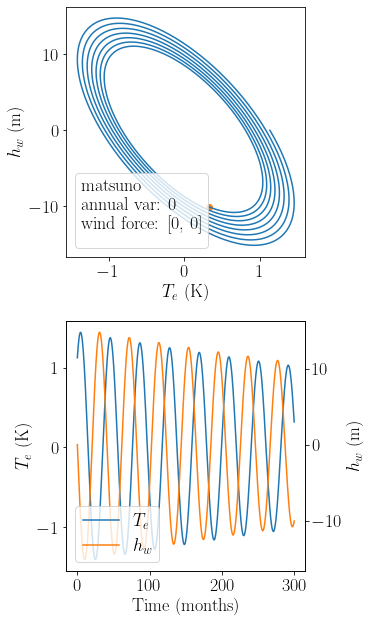

In [6]:
# Matsuno with same timestep as Forward Euler is unstable (decaying)
dt = 0.1
nt = 3000
iterating_func = matsuno
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, iterating_func, show_plot=True)

No handles with labels found to put in legend.


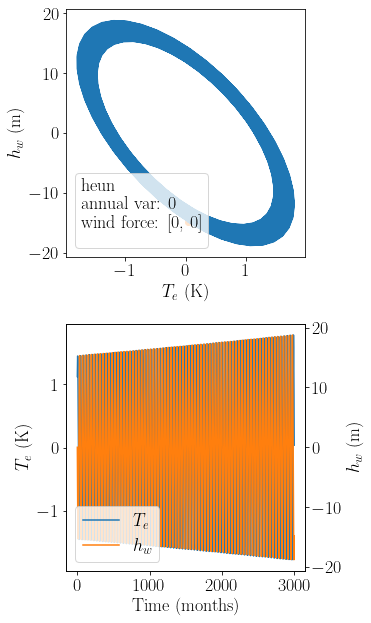

In [7]:
# Heun is mostly stable but does grow with large timestep and large nt
dt = 1
nt = 3000
iterating_func = heun
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, iterating_func, show_plot=True)

In [8]:
# Runge-kutta with large timestep and large nt is stable
dt = 1
nt = 3000
iterating_func = runge_kutta
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, iterating_func, show_plot=True)

No handles with labels found to put in legend.


In [9]:
# Test subcritical value of mu: dissipates
dt = 1
nt = 200
params = params_lin_subcrit
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


No handles with labels found to put in legend.


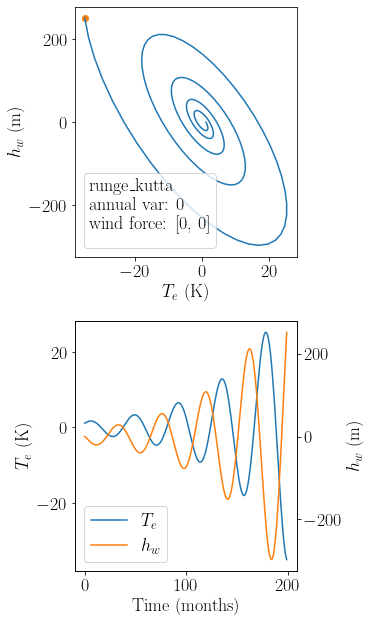

In [10]:
# Test supercritical value of mu: amplifies
dt = 1
nt = 200
params = params_lin_supercrit
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

In [11]:
# Nonlinearity with critical mu
dt = 1
nt = 300
params = params_nonlin
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


No handles with labels found to put in legend.


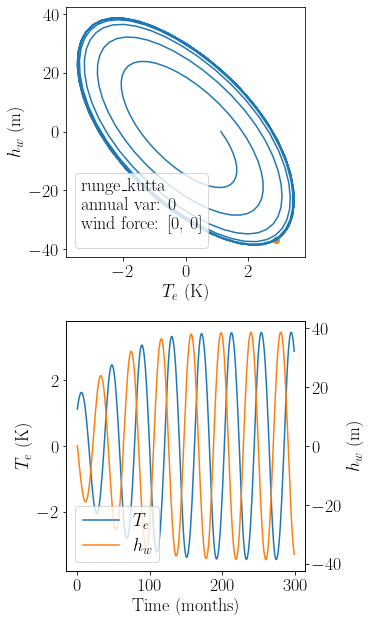

In [12]:
# Nonlinearity with supercritical mu = 0.7
dt = 1
nt = 300
params = params_nonlin_supercrit
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


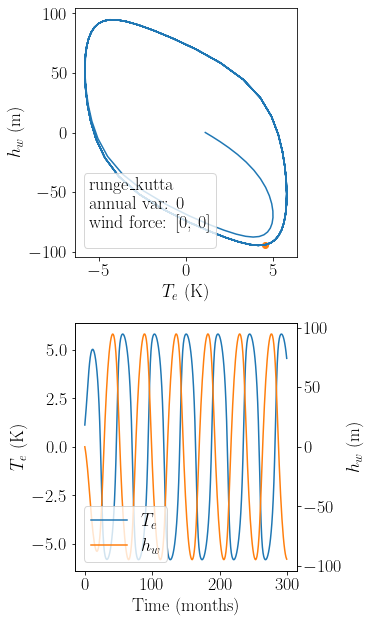

In [13]:
# Nonlinearity with supercritical mu = 0.9
dt = 1
nt = 300
params = params_nonlin_supercrit_9
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


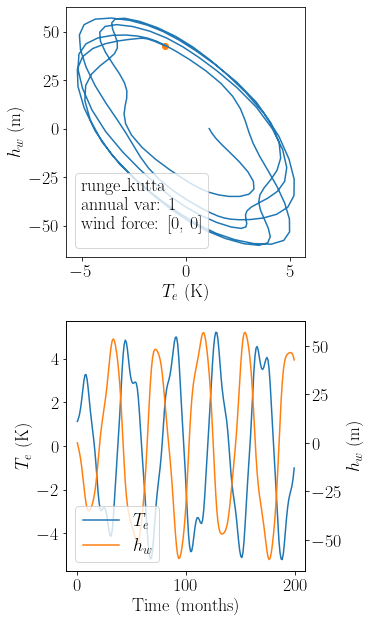

In [14]:
# Self excitation
dt = 1
nt = 200
params = params_nonlin
av_flag = 1
wf_ann_flag = 0
wf_ran_flag = 0
flags = [av_flag, wf_ann_flag, wf_ran_flag]
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


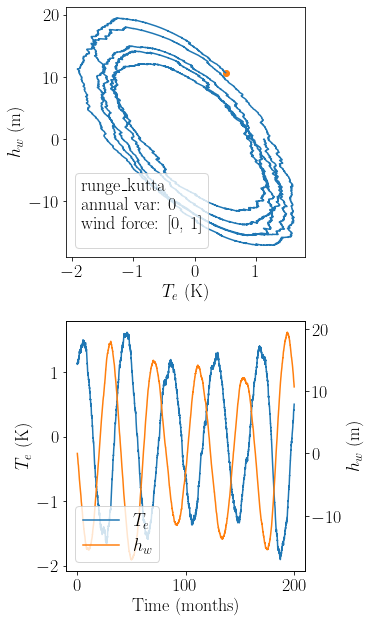

In [15]:
# Stochastic Forcing: Linear, random variation only
dt = 1/30
nt = 6000
params = params_lin
av_flag = 0
wf_ann_flag = 0
wf_ran_flag = 1
flags = [av_flag, wf_ann_flag, wf_ran_flag]
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

In [16]:
# Stochastic Forcing: Linear, self-excitation disabled
dt = 1/30
nt = 6000
params = params_lin
av_flag = 0
wf_ann_flag = 1
wf_ran_flag = 1
flags = [av_flag, wf_ann_flag, wf_ran_flag]
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


No handles with labels found to put in legend.


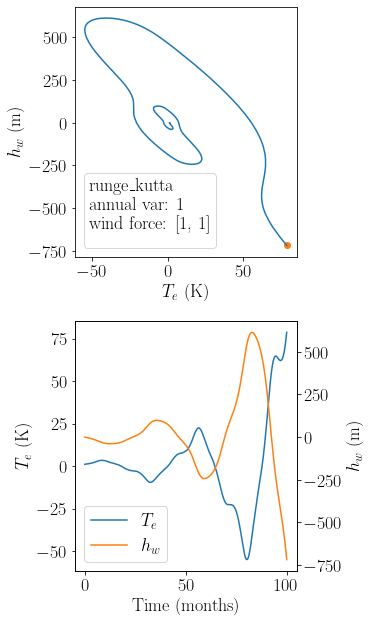

In [17]:
# Stochastic Forcing: Linear, everything enabled
dt = 1/30
nt = 3000
params = params_lin
av_flag = 1
wf_ann_flag = 1
wf_ran_flag = 1
flags = [av_flag, wf_ann_flag, wf_ran_flag]
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

In [18]:
# Stochastic Forcing: Nonlinear without self excitation, random stresses only
dt = 1/30
nt = 6000
params = params_nonlin
av_flag = 0
wf_ann_flag = 0
wf_ran_flag = 1
flags = [av_flag, wf_ann_flag, wf_ran_flag]
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


In [19]:
# Stochastic Forcing: Nonlinear without self excitation, annual variation only
dt = 1/30
nt = 6000
params = params_nonlin
av_flag = 0
wf_ann_flag = 1
wf_ran_flag = 0
flags = [av_flag, wf_ann_flag, wf_ran_flag]
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


In [20]:
# Stochastic Forcing without self-excitation, both components enabled
dt = 1/30
nt = 6000
params = params_nonlin
av_flag = 0
wf_ann_flag = 1
wf_ran_flag = 1
flags = [av_flag, wf_ann_flag, wf_ran_flag]
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


In [21]:
# Stochastic Forcing + self-excitation
dt = 1/30
nt = 6000
params = params_nonlin
av_flag = 1
wf_ann_flag = 1
wf_ran_flag = 1
flags = [av_flag, wf_ann_flag, wf_ran_flag]
Te_array, hw_array, time_array = run_model(dt, nt, inits, params, flags, show_plot=True)

No handles with labels found to put in legend.


No handles with labels found to put in legend.


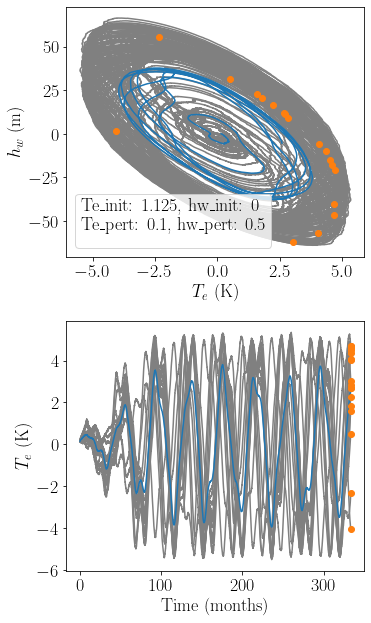

In [22]:
# Run ensemble with everything enabled

# set dt = 1/30 to run for 1 day
dt = 1/30
nt = 10000

# Initial Conditions
Te_init = 1.125
hw_init = 0
inits = [Te_init, hw_init]

# Choose parameter set 
params = params_nonlin

# Flags
av_flag = 1
wf_ann_flag = 1
wf_ran_flag = 1
flags = [av_flag, wf_ann_flag, wf_ran_flag]

# Number of ensemble members
ens_members = 18

# Perturbation scales
p_scale_Te = 0.1
p_scale_hw = 0.5
pert_scales = [p_scale_Te, p_scale_hw]

run_ensemble(ens_members, pert_scales, dt, nt, inits, params, flags)

No handles with labels found to put in legend.


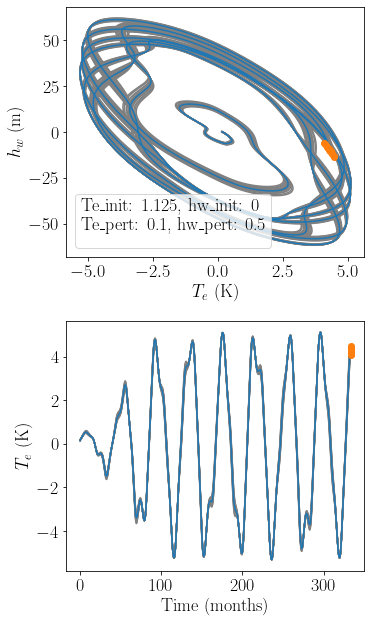

In [23]:
# Run ensemble without random forcings

# set dt = 1/30 to run for 1 day
dt = 1/30
nt = 10000

# Initial Conditions
Te_init = 1.125
hw_init = 0
inits = [Te_init, hw_init]

# Flags 
av_flag = 1
wf_ann_flag = 1
wf_ran_flag = 0
flags = [av_flag, wf_ann_flag, wf_ran_flag]

# Ensemble members
ens_members = 18

# Perturbation scale
p_scale_Te = 0.1
p_scale_hw = 0.5
pert_scales = [p_scale_Te, p_scale_hw]

run_ensemble(ens_members, pert_scales, dt, nt, inits, params, flags)

No handles with labels found to put in legend.


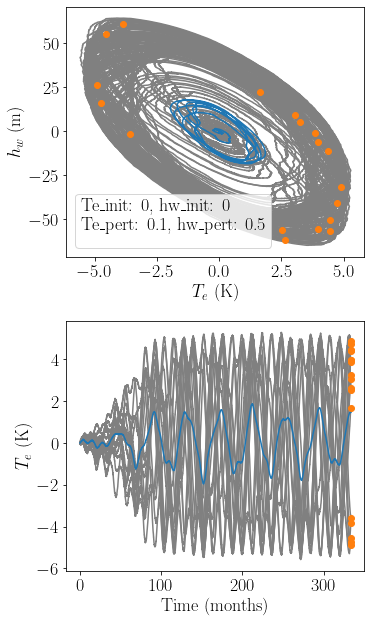

In [24]:
# Test what happens at T=h=0 for the ICs
av_flag = 1
wf_ann_flag = 1
wf_ran_flag = 1
flags = [av_flag, wf_ann_flag, wf_ran_flag]

Te_init = 0
hw_init = 0
inits = [Te_init, hw_init]

run_ensemble(ens_members, pert_scales, dt, nt, inits, params, flags)